# Make an animated movie of Swift Data

In the last notebook we made an image from the full stack of events.  In this notebook we make an animated movie, binning by time.

In [1]:
%config Completer.use_jedi = False

In [2]:
from astropy.io import fits
from astropy.table import Table
from scipy.sparse import coo_matrix
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'

### Read in the event-level data

See the previous notebook for how this works.

In [3]:
from scipy.stats import binned_statistic

In [4]:
hdus = fits.open('../data/sw00031677006uuuw1po_uf.evt')
hdu = hdus[1]
raw_data = hdu.data
raw_table = Table(raw_data)
df = raw_table.to_pandas()

In [5]:
df['flux'] = 1

In [6]:
n_time_bins = 100

In [7]:
bins = np.linspace(df.TIME.min(), df.TIME.max(), num=n_time_bins)

In [8]:
indices = np.digitize(df.TIME.values, bins)

In [9]:
df['time_index'] = indices

### Convert the sparse matrix to a dense matrix, *one time bin at a time*

We will count each photon into bins of time.

In [10]:
from tqdm.notebook import tqdm

In [11]:
data_cube = np.zeros((n_time_bins, 2048, 2048))
for time_index, group in tqdm(df.groupby('time_index')):
    sparse_input = (group.flux, (group.RAWX, group.RAWY))
    sparse_matrix = coo_matrix(sparse_input, shape=(2048,2048))
    data_cube[time_index-1, :,:] = sparse_matrix.todense()

  0%|          | 0/100 [00:00<?, ?it/s]

In [12]:
data_cube.shape

(100, 2048, 2048)

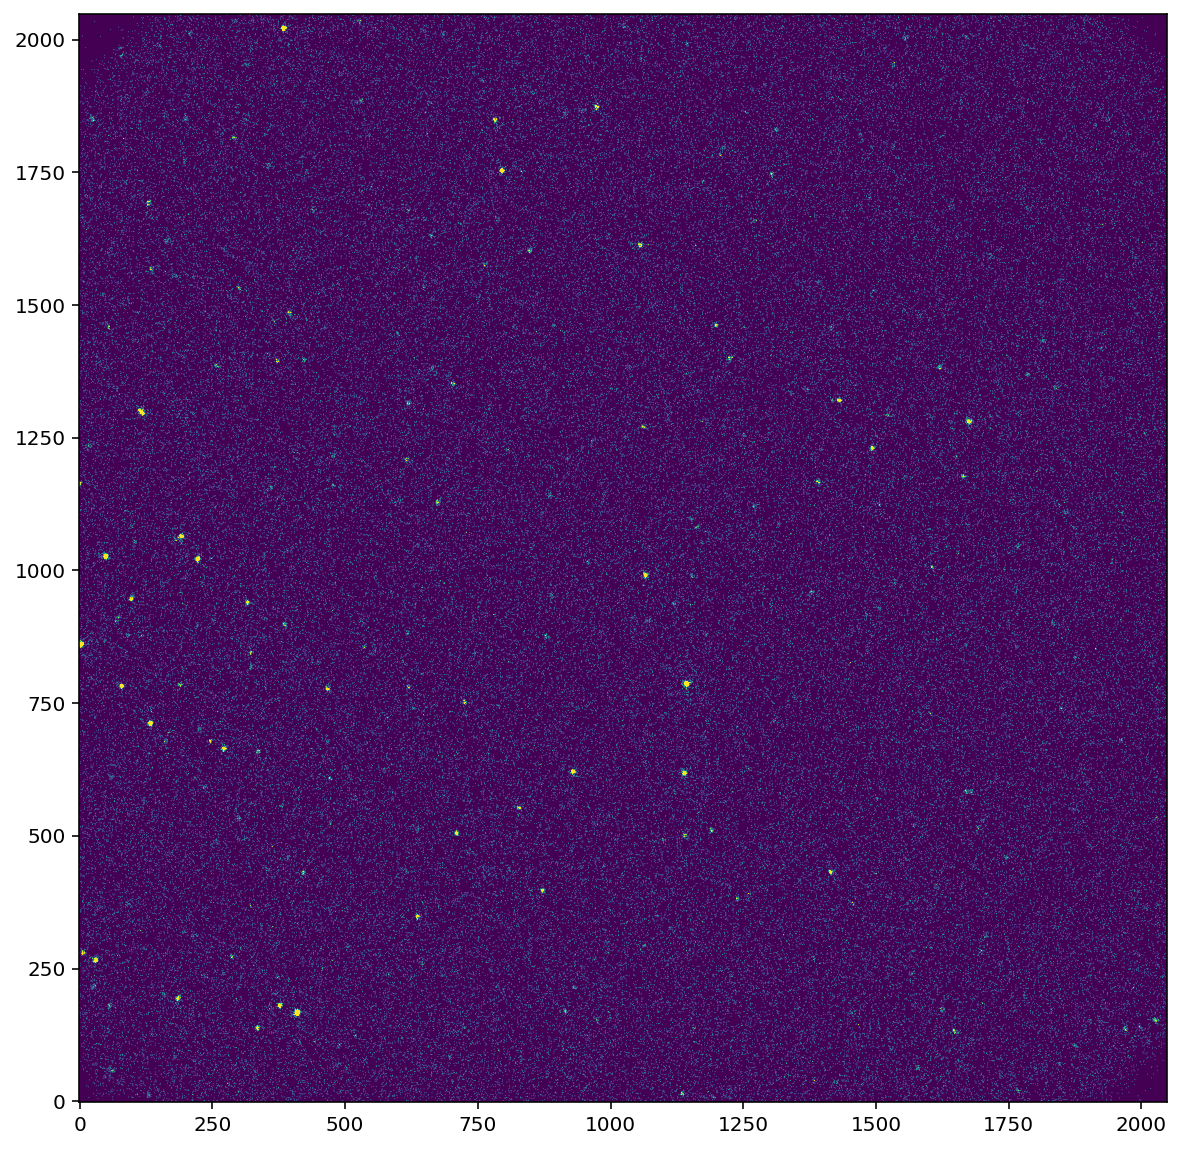

In [16]:
plt.figure(figsize=(10,10))
plt.imshow(data_cube[53], vmin=0, vmax=1, origin='lower');

In [18]:
data_cube[:, 123:125, 941:943].sum(axis=(1,2))

array([0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 2.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 2., 1., 1., 0., 0., 0., 0., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

Yay! We made an image from the Swift Event-level data!